In [3]:
import h5py 
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import constants
import os
import tqdm
import random
import cmath
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [111]:
### Testing for Euler notation: e^(i*phi)
import math
import cmath
#x = np.random.uniform(-1,1,4)


#y = cmath.exp(1j*2*math.pi*np.random.uniform(-1,1))
            
#print(y)
#print(cmath.phase(y))

a = [1,1,1,1]
phi = [0, math.pi/4, -math.pi/2, math.pi/2]

p = []
for i in range(4):
    p.append(np.dot(a[i], np.exp(1j*phi[i])))
    
print(p)

[(1+0j), (0.7071067811865476+0.7071067811865475j), (6.123233995736766e-17-1j), (6.123233995736766e-17+1j)]


In [18]:
x  = 2*math.pi*np.random.rand(1,5) - math.pi
print(x)


[[-2.42245943 -1.45950417 -1.76524025 -2.78844221 -2.38750938]]


In [7]:
import numpy as np
N = 100
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
#Input = []
#for i in range(N):
#    Input.append( complex(x[i],y[i]) )
#Input = [complex(x, y) for x, y in zip(x, y)]

######################
Input = x+1j*y

Maxiter = 15000;                                 #Max number of iterations

error_tol = 0.2                                #Error tolerance


f = np.absolute(Input)                                #Magnitude of sampled points, known priori

F = np.absolute(np.fft.fft(Input)/N)


phi = 2*math.pi*np.random.rand(N) - math.pi                      #Initialize with Uniform (or Gaussian, my idea) random process
#phi = [0.1, 0.1, 0, 0.21, -0.11, 0, 0.31, 1.01, 0, 1.2]
#x = f.math.exp(1j*phi)                              #1st sample estimate #dot product
#e = []
#for i in range(N):
#    e.append(np.exp(1j*phi[i]))
        
#x = [f * e for f, e in zip(f, e)]
#x = [f * np.exp(1j*phi) for f, phi in zip(f, phi)]
###############################################
x = f*np.exp(1j*phi)

k = 0;

error_test = [[0 for a in range(2)] for b in range(Maxiter)] 
error_test[0][0] = 3        #Diffraction plane magnitude error.
error_test[0][1] = 3        #Object plan magnitude error.

while ((error_test[k][1] > error_tol) and (k < Maxiter-1)):  
    k = k + 1
    X = np.fft.fft(x)/N                                                 #DFT of estimate
    error_test[k][0] = math.sqrt(N)*np.linalg.norm(abs(X) - F)          #diffraction magnitude error, from original object plane.
    #Y = []
    #for i in range(len(X)):
    #    Y.append(np.dot(F[i], np.exp(1j*cmath.phase(X[i]))));                             #Correct to |F|
    #Y = [F * np.exp(1j*cmath.phase(X)) for F, X in zip(F, X)]
    ############################################
    Y = F*np.exp(1j*np.angle(X))
    
    y = N*np.fft.ifft(Y);                                      #IDFT of estimate
    error_test[k][1] = np.linalg.norm(abs(y)-f);                #Object plane magnitude error
    #x = []
    #for i in range(len(y)):
    #    x.append(np.dot(f[i], np.exp(1j*cmath.phase(y[i]))));                              #correct to |f|, image plane.
    #X = [f * np.exp(1j*cmath.phase(y)) for f, y in zip(f, y)]
    ############################################
    X = f*np.exp(1j*np.angle(y))
    #k = k + 1

print(k)

14999


In [66]:
# Figure 1
%matplotlib inline
x = np.arange()
y = np.~
fig = plt.figure()
fig.plot(x, y)
fig.set_title("Phase comparison: blue=actual, red=retrieved, g=initial guess")
fig.set_xlabel('Time (seconds)')
fig.set_ylabel('Retrieved phase')



plot(t, unwrap(angle(Input)));
plot(t, unwrap(angle(y)),'r');
plot(t, phi, 'g');
hold off;
title('Phase comparison: blue=actual, red=retrieved, g=initial guess');
xlabel('Time (seconds)');

SyntaxError: invalid syntax (<ipython-input-66-e8106353e53d>, line 4)

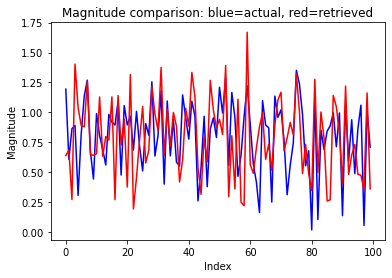

In [74]:
# Figure 2

plt.plot(f, '-b')
plt.plot(abs(y), '-r')
plt.title("Magnitude comparison: blue=actual, red=retrieved")
plt.xlabel("Index")
plt.ylabel("Magnitude")
plt.show()

In [ ]:
# Figure 3

plt.([1:k], error_test(2,:),'-o');
title('Error convergence');
xlabel('Number of interations (k)');
ylabel('Object Plane Magnitude Error');